In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAIN_PATH = "Train.csv"

df = pd.read_csv(TRAIN_PATH)

In [3]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
df['category_id'] = df['Category'].factorize()[0]

df['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [5]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [6]:
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [7]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [8]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [9]:
category_to_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [10]:
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

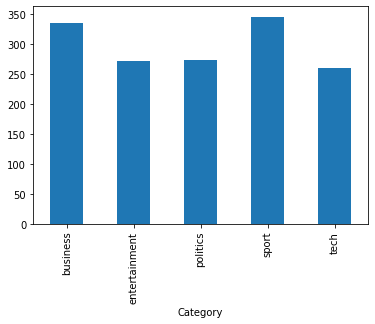

In [11]:
df.groupby('Category').category_id.count().plot.bar(ylim=0)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray() 
labels = df.category_id                         

In [13]:
features.shape

(1490, 9927)

In [14]:
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [15]:
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [16]:
from sklearn.feature_selection import chi2

N = 3


for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   
  indices = np.argsort(features_chi2[0])                                 
  feature_names = np.array(tfidf.get_feature_names())[indices]           
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) 
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) 

# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


In [17]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [18]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

In [19]:
projected_features.shape

(447, 2)

In [20]:
my_id = 0 # Select a category_id
projected_features[(labels[indices] == my_id).values]

array([[-17.409828  , -20.436989  ],
       [ -9.56882   , -11.314312  ],
       [-17.156994  ,  -6.452465  ],
       [-10.862223  , -21.660397  ],
       [-19.501608  ,   4.6090965 ],
       [-11.990335  , -16.382895  ],
       [-27.134926  ,  -2.8496113 ],
       [ -9.668595  , -17.357132  ],
       [  8.465661  ,  -9.051764  ],
       [-19.876314  ,  -9.820042  ],
       [  2.6430216 ,   3.9847393 ],
       [-15.166494  , -10.5767145 ],
       [ 15.052534  , -22.136509  ],
       [-29.180244  , -15.261823  ],
       [-11.231472  , -24.399818  ],
       [-13.417371  , -11.908246  ],
       [ -8.409627  , -11.635613  ],
       [-11.572334  , -18.307085  ],
       [-17.998095  , -14.864076  ],
       [-26.832064  ,  -5.992347  ],
       [ -0.91015923, -20.449903  ],
       [-23.755339  , -14.732829  ],
       [-17.284416  ,  -6.835661  ],
       [-22.186396  , -10.912631  ],
       [-11.207357  , -14.555125  ],
       [-25.065447  , -10.098723  ],
       [-22.816729  , -12.928076  ],
 

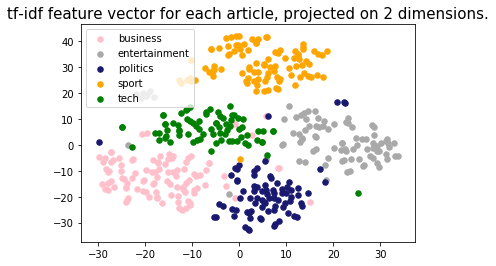

In [21]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [22]:
features.shape

(1490, 9927)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


In [24]:

CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty


In [25]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [26]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

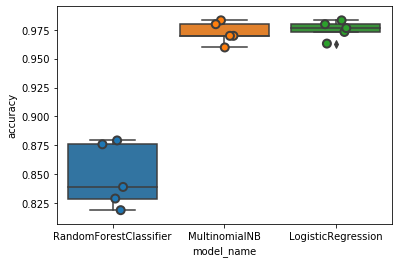

In [27]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [28]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.975168
MultinomialNB             0.972483
RandomForestClassifier    0.848322
Name: accuracy, dtype: float64

In [29]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.838926
1,RandomForestClassifier,1,0.818792
2,RandomForestClassifier,2,0.828859
3,RandomForestClassifier,3,0.875839
4,RandomForestClassifier,4,0.879195
5,MultinomialNB,0,0.969799
6,MultinomialNB,1,0.959732
7,MultinomialNB,2,0.983221
8,MultinomialNB,3,0.979866
9,MultinomialNB,4,0.969799


In [30]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

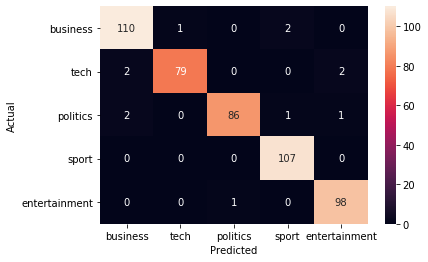

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [32]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'tech' predicted as 'business' : 2 examples.


641    us woman sues over cartridges a us woman is su...
549    man auctions ad space on forehead a 20-year-ol...
Name: Text, dtype: object


'politics' predicted as 'business' : 2 examples.


962    hatfield executives go on trial engineering fi...
249    eu fraud clampdown urged eu member states are ...
Name: Text, dtype: object


'business' predicted as 'sport' : 2 examples.


61     arsenal  may seek full share listing  arsenal ...
728    christmas shoppers flock to tills shops all ov...
Name: Text, dtype: object


'tech' predicted as 'entertainment' : 2 examples.


1091    ultimate game  award for doom 3 sci-fi shooter...
1115    ultimate game  award for doom 3 sci-fi shooter...
Name: Text, dtype: object

In [33]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# model.coef_ contains the importance of each feature for each category
model.coef_

array([[ 0.46799432,  0.01813872, -0.0715333 , ..., -0.03318298,
         0.0068823 , -0.02849203],
       [-0.02957523, -0.04366737, -0.01371468, ...,  0.00362675,
        -0.02877942, -0.02070068],
       [ 0.05006025, -0.05159908, -0.04674601, ..., -0.00638322,
        -0.03112648, -0.02362395],
       [-0.61687406, -0.04152046, -0.05352312, ...,  0.08450437,
         0.08574049,  0.09981232],
       [ 0.12839471,  0.11864819,  0.18551711, ..., -0.04856492,
        -0.03271689, -0.02699566]])

In [35]:
from sklearn.feature_selection import chi2

N = 5
for Category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])   # This time using the model co-eficients / weights
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . firm
       . bank
       . company
       . shares
       . market
  . Top bigrams:
       . chief executive
       . analysts said
       . stock market
       . economic growth
       . oil prices
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . star
       . band
  . Top bigrams:
       . box office
       . los angeles
       . film festival
       . new york
       . big brother
# 'politics':
  . Top unigrams:
       . labour
       . mr
       . party
       . election
       . government
  . Top bigrams:
       . mr blair
       . prime minister
       . tony blair
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . match
       . win
       . game
       . coach
       . cup
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . world cup
       . grand slam
# 'tech':
  . Top unigrams:
       . users
       . software
       .

In [36]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [1]:
import pickle

# Storing model
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined

In [3]:
#Loading model
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

filename = 'finalized_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')


c:\users\pavan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
data = ["Finland won their first game at a major finals as they beat Denmark in a Euro 2020 match that was overshadowed by Danish midfielder Christian Eriksen collapsing on the pitch."]
text_features = tfidf.transform(data)
preds = model.predict(text_features)
print(preds)

NotFittedError: The TF-IDF vectorizer is not fitted

In [48]:
id_to_category[preds[0]]

'sport'